In [9]:
import pandas as pd
import numpy as np

# The function that returns the dataframe of all Air quality data from 2019 to 2021
def main_dataFrame():
    df_2021 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020.csv', skiprows=4, engine='python')

    df_2020Q1 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q1.csv', skiprows=4, engine='python')
    df_2020Q2 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q2.csv', skiprows=4, engine='python')
    df_2020Q3 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q3.csv', skiprows=4, engine='python')
    df_2020Q4 = pd.read_csv('../data/waqi-covid19-airqualitydata-2020Q4.csv', skiprows=4, engine='python')
    df_2020 = pd.concat([df_2020Q1, df_2020Q2, df_2020Q3, df_2020Q4])

    df_2019Q1 = pd.read_csv('../data/waqi-covid19-airqualitydata-2019Q1.csv', skiprows=4, engine='python')
    df_2019Q2 = pd.read_csv('../data/waqi-covid19-airqualitydata-2019Q2.csv', skiprows=4, engine='python')
    df_2019Q3 = pd.read_csv('../data/waqi-covid19-airqualitydata-2019Q3.csv', skiprows=4, engine='python')
    df_2019Q4 = pd.read_csv('../data/waqi-covid19-airqualitydata-2019Q4.csv', skiprows=4, engine='python')
    df_2019 = pd.concat([df_2019Q1, df_2019Q2, df_2019Q3, df_2019Q4])

    df_2021_2020_2019 = pd.concat([df_2021, df_2020, df_2019])
    df_2021_2020_2019['Date'] = pd.to_datetime(df_2021_2020_2019['Date'])
    return df_2021_2020_2019


df_lockdown_dates = pd.read_csv('../data/countryLockdowndates.csv', engine='python')
df_lockdown_datesJHUMatch = pd.read_csv('../data/countryLockdowndatesJHUMatch.csv', engine='python')
df_lockdown_dates_full = pd.concat([df_lockdown_dates, df_lockdown_datesJHUMatch])
df_lockdown_dates_full['Date'] = pd.to_datetime(df_lockdown_dates_full['Date'])

#print(df_2021_2020_2019.head())
df_lockdown_dates_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  507 non-null    object        
 1   Province        129 non-null    object        
 2   Date            364 non-null    datetime64[ns]
 3   Type            441 non-null    object        
 4   Reference       373 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.8+ KB


In [10]:
# The function which returns the dataframe by filtering one specific specie
def dataFrame_by_specie(specie):
    df = main_dataFrame()
    df_2021_2020_2019_specie = df[df['Specie']==specie]
    df_2021_2020_2019_specie = df_2021_2020_2019_specie[['Date', 'Country', 'City', 'max']]
    df_2021_2020_specie = df_2021_2020_2019_specie[df_2021_2020_2019_specie['Date']>= "2020-01-01"]
    return df_2021_2020_specie

In [11]:
# The function which returns the list of the top ten cities on max by filtering the whole dataframe on one specific specie
def top_ten_cities_by_specie(specie):
    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2021_2020_specie_byCity = df_2021_2020_specie.groupby('City').agg({"max":np.average})
    df_2021_2020_specie_byCity = df_2021_2020_specie_byCity.sort_values(by=['max'], ascending=False)
    top_ten_cities_by_specie = df_2021_2020_specie_byCity.index[0:10].to_list()    
    return top_ten_cities_by_specie

top_ten_cities_by_specie('no2')

['Jerusalem',
 'Delhi',
 'Tel Aviv',
 'Mérida',
 'Tehran',
 'Istanbul',
 'Khorramabad',
 'Seoul',
 'Lucknow',
 'Isfahan']

In [12]:
# The function which returns the list of the top ten countries on the average_max by filtering the whole dataframe on one specific specie
def top_ten_countries_by_specie(specie):
    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2021_2020_specie_byCountry = df_2021_2020_specie.groupby('Country').agg({"max":np.average})
    df_2021_2020_specie_byCountry = df_2021_2020_specie_byCountry.sort_values(by=['max'], ascending=False)
    top_ten_countries_by_specie = df_2021_2020_specie_byCountry.index[0:10].to_list()    
    return top_ten_countries_by_specie

top_ten_countries_by_specie('no2')

['HK', 'IL', 'IR', 'TR', 'KR', 'IN', 'MO', 'MK', 'AE', 'GR']

In [13]:
#print(df_2021_2020_2019['Specie'].unique())

# The function which returns a dataframe by filtering the whole dataframe on one specific specie and one single city
def dataFrame_one_specie_by_one_city(specie,city):
    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2020_2021_specie_byCity = df_2021_2020_specie[df_2021_2020_specie['City']== city]
    return df_2020_2021_specie_byCity
dataFrame_one_specie_by_one_city('no2','Jerusalem')    

,Date,Country,City,max
486131,2020-03-09,IL,Jerusalem,151.8
486132,2020-03-12,IL,Jerusalem,146.6
486133,2020-03-26,IL,Jerusalem,69.9
486134,2020-01-05,IL,Jerusalem,117.4
486135,2020-02-25,IL,Jerusalem,117.1
...,...,...,...,...
246767,2020-01-02,IL,Jerusalem,161.7
246774,2020-01-01,IL,Jerusalem,7.5
246801,2020-01-05,IL,Jerusalem,117.4
246807,2020-01-03,IL,Jerusalem,133.7


In [14]:
# The function which returns a dataframe by filtering the whole dataframe on one specific specie and one single country
def dataFrame_one_specie_by_one_country(specie,country):
    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2020_2021_specie_byCountry = df_2021_2020_specie[df_2021_2020_specie['Country']== country]
    return df_2020_2021_specie_byCountry
dataFrame_one_specie_by_one_country('no2','US')   

,Date,Country,City,max
270732,2020-02-20,US,Oklahoma City,9.3
270733,2020-02-26,US,Oklahoma City,29.7
270734,2020-03-01,US,Oklahoma City,28.8
270735,2020-03-15,US,Oklahoma City,8.4
270736,2020-03-23,US,Oklahoma City,11.2
...,...,...,...,...
87209,2020-01-04,US,Queens,27.9
87215,2020-01-02,US,Queens,38.9
87226,2020-01-01,US,Queens,16.3
87227,2020-01-03,US,Queens,34.3


In [15]:
# The function which returns a dataframe of the top ten cities on the average_max of one specific specie 
def dataframe_top_ten_cities_by_specie(specie):

    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2021_2020_specie_byCity = df_2021_2020_specie.groupby('City').agg({"max":np.average})
    df_2021_2020_specie_byCity = df_2021_2020_specie_byCity.sort_values(by=['max'], ascending=False)
    df_top_ten_cities_by_specie = df_2021_2020_specie_byCity.head(10)    
    return df_top_ten_cities_by_specie

dataframe_top_ten_cities_by_specie('no2')

,max
City,
Jerusalem,113.108861
Delhi,112.096356
Tel Aviv,104.143038
Mérida,101.600000
Tehran,95.522059
Istanbul,86.490952
Khorramabad,73.844691
Seoul,73.827089
Lucknow,67.446921


In [16]:
# The function which returns a dataframe of the top ten countries on the average_max of one specific specie 
def dataframe_top_ten_countries_by_specie(specie):
    df_2021_2020_specie = dataFrame_by_specie(specie)
    df_2021_2020_specie_byCountry = df_2021_2020_specie.groupby('Country').agg({"max":np.average})
    df_2021_2020_specie_byCountry = df_2021_2020_specie_byCountry.sort_values(by=['max'], ascending=False)
    df_top_ten_countries_by_specie = df_2021_2020_specie_byCountry.head(10)    
    return df_top_ten_countries_by_specie

dataframe_top_ten_countries_by_specie('no2')

,max
Country,
HK,61.093924
IL,55.897215
IR,45.523226
TR,41.919021
KR,40.327573
IN,39.566404
MO,37.311095
MK,36.201347
AE,34.858481


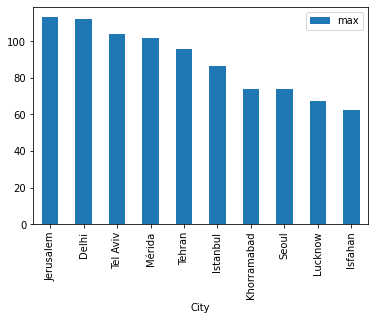

In [17]:
import matplotlib.pyplot as plt
df = dataframe_top_ten_cities_by_specie('no2')
df.reset_index(inplace=True)
ax = df.plot.bar(x='City', y='max')

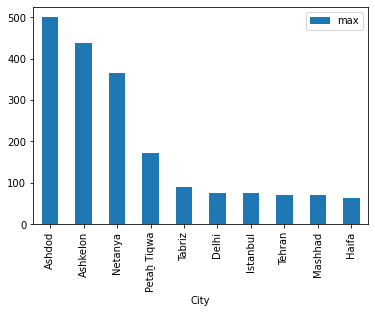

In [18]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_cities_by_specie('co')
df.reset_index(inplace=True)
ax = df.plot.bar(x='City', y='max')

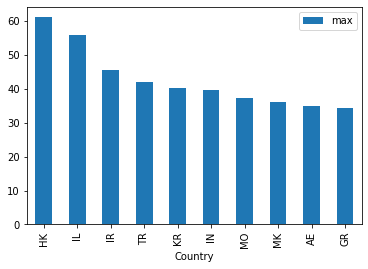

In [19]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_countries_by_specie('no2')
df.reset_index(inplace=True)
ax = df.plot.bar(x='Country', y='max')

In [ ]:
#import matplotlib.pyplot as plt
df = dataframe_top_ten_countries_by_specie('co')
df.reset_index(inplace=True)
ax = df.plot.bar(x='Country', y='max')